In [1]:
import os
import requests

In [7]:
DATA_DIR = "data"
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)
URLS = {
    'KDDTrain+.txt' : 'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt' ,
    'KDDTest+.txt' : 'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.txt'
}

def download_file(url, filename):
    localpath = os.path.join(DATA_DIR, filename)

    if os.path.exists(filename):
        print(f" File Found: {filename} already exists")
        return
    print(f" Downloading {filename}...")

    try:
        response = requests.get(url, stream = True)
        response.raise_for_status()

        with open(localpath, 'wb') as f:
            for chunk in response.iter_content(chunk_size = 8000):
                f.write(chunk)
        print(f" Successfully saved to {localpath}")

    except Exception as e:
        print(f" Failed to download {filename} : {e}")

In [8]:
for filename, url in URLS.items():
    download_file(url, filename)
print("\nAll Files should now be in 'data' folder")    

 Successfully saved to data\KDDTrain+.txt
 Successfully saved to data\KDDTest+.txt

All Files should now be in 'data' folder


In [12]:
import pandas as pd
import os

# Define the path to your data
DATA_DIR = 'data'
TRAIN_PATH = os.path.join(DATA_DIR, 'KDDTrain+.txt')

# Define the standard column names for the NSL-KDD dataset
COLUMNS = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", 
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", 
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", 
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", 
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", 
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", 
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", 
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", 
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "class", "difficulty_level"
]

# Read the dataset
# header=None tells pandas there is no header row in the file
# names=COLUMNS assign the column names we defined above
df = pd.read_csv(TRAIN_PATH, header=None, names=COLUMNS)

# Display the first few rows
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [13]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [14]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [15]:
train_path = os.path.join(DATA_DIR, 'KDDTrain+.txt')
test_path = os.path.join(DATA_DIR, 'KDDTest+.txt')

# Read CSV with our column names
train_df = pd.read_csv(train_path, names=COLUMNS)
test_df = pd.read_csv(test_path, names=COLUMNS)

print("Data Loaded Successfully!")

Data Loaded Successfully!


In [34]:
LABELED_DIR = "labeled_data"

if not os.path.exists(LABELED_DIR):
    os.makedirs(LABELED_DIR)
train_df.to_csv(os.path.join(LABELED_DIR, "KDDTrain_data.csv"), index=False)
test_df.to_csv(os.path.join(LABELED_DIR, "KDDTest_data.csv"), index=False)

print("Processed datasets saved successfully!")

Processed datasets saved successfully!


In [32]:
print("\n---Data Info---")
train_df.info()


---Data Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-n

In [19]:
print(f"Missing Values in teh Training Data: {train_df.isnull().sum().sum()}")
print(f"Missing Values in teh Testing Data: {test_df.isnull().sum()}")

Missing Values in teh Training Data: 0
Missing Values in teh Testing Data: duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
s

In [20]:
print(f"Duplicate data in the training dataset {train_df.duplicated().sum()}")
print(f"Duplicate data in the test dataset {test_df.duplicated()}")

Duplicate data in the training dataset 0
Duplicate data in the test dataset 0        False
1        False
2        False
3        False
4        False
         ...  
22539    False
22540    False
22541    False
22542    False
22543    False
Length: 22544, dtype: bool


In [21]:
train_df['class']

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: class, Length: 125973, dtype: object

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
unique_labels = train_df['class'].unique()
print(f" There are {len(unique_labels)} unique lables including 'normal'.")
print(unique_labels)

 There are 23 unique lables including 'normal'.
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [27]:
train_df['class'].value_counts()

class
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

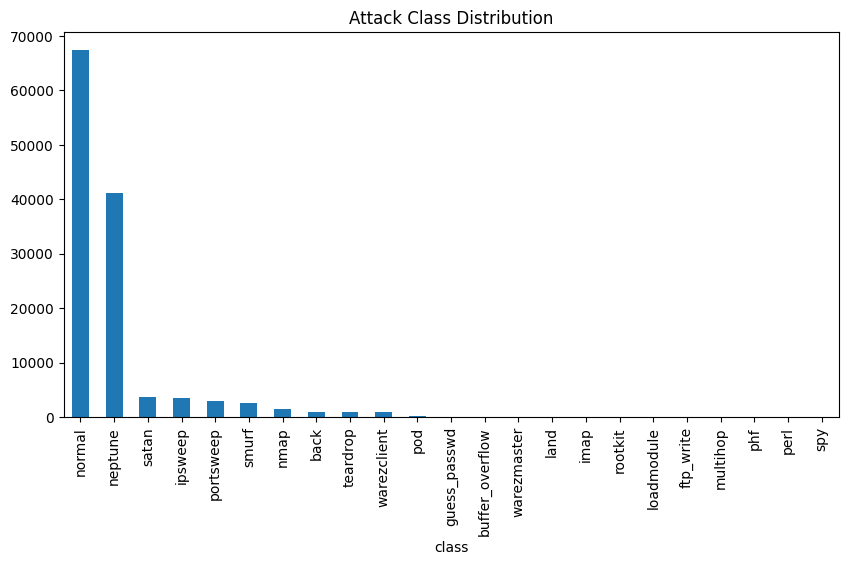

In [29]:
plt.figure(figsize=(10,5))
train_df['class'].value_counts().plot(kind='bar')
plt.title("Attack Class Distribution")
plt.xticks(rotation=90)
plt.show()

In [37]:
train_df['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)